<span> <center><img src="https://m.eyeofriyadh.com/directory/images/2020/11/185d43f5813e1.jpg" /></span>
#  <b><span style="color:#05b3e4"><center> Project 2: Investigate a Dataset </span></b> </center>
### <span style="color:#5c374c"><center>Hassan Almaghrabi </span></b> </center>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

 The data set is collected from The Movie Database (TMDb) contains information about 10,000 movies from the year 1960 to 2015

**Dataset Columns:**
1. id : A unique identifier for each movie.
2. imdb_id : A unique identifier for each movie in imdb.
3. popularity : A numeric quantity specifying the movie popularity.
4. budget : The budget in which the movie was made.
5. revenue : The worldwide revenue generated by the movie.
6. original_title : The title of the movie before translation or adaptation.
7. cast : The name of lead and supporting actors.
8. homepage : A link to the homepage of the movie.
9. director : Name of the movie director.
10. tagline : Movie's tagline.
11. keywords : The keywords or tags related to the movie.
12. overview : A brief description of the movie.
13. runtime : The running time of the movie in minutes.
14. genres : The genres of the movie, Action, Comedy ,Thriller etc.
15. production_companies : The production house of the movie.
16. release_date : The date on which it was released.
17. vote_count : the count of votes recieved.
18. release_year : The year on which it was released.
19. budget_adj : Budget in terms of 2010 dollars, accounting for inflation over time.
20. revenue_adj : Revenue in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

<ul>
<li><a href="#q1">What is the highest genre in terms of revenue in the year 2015?</a></li>
<li><a href="#q2">Who is the more actor acting from in the period from 2010 to 2015?</a></li>
<li><a href="#q3">What are the top 10 movies that make a loss where revenue does not exceed the budget?</a></li>
</ul>


In [1]:
# importing the necessary libriries in our analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading the data from csv file
df = pd.read_csv("tmdb-movies.csv")

In [3]:
# Drop some of un-needed columns in our analysis
df.drop(columns=['id','imdb_id','homepage', 'tagline','keywords','production_companies','overview'], axis=1, inplace=True)

In [4]:
# the shape of our data frame --> (rows, columns)
df.shape

(10866, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_date    10866 non-null  object 
 9   vote_count      10866 non-null  int64  
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [6]:
# look at the columns that contian missing values
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [7]:
# Filling the missing recordes with the value "Unkown" since our missing column are : 'cast', 'director' ,and 'genres'
df.fillna("Unkown", inplace=True)

In [8]:
# our Data now is empty from missing values
df.isnull().sum().sum()

0

In [9]:
# function to deal with multivalues columns

def get_single_item(df:pd.DataFrame, col:str) -> pd.DataFrame:
    """ This function will take a data frame and column name
        that have record in the format --> item1|item2|item3 
        and return a new data frame that have each item 
        in a separate raw with the same record in other columns
    """
    
    df.reset_index(inplace=True) # reseting the index to avoid errors
    
    result_df = pd.DataFrame(columns=df.columns) # Initilize a new dataframe
    
    for index ,row in df[[col]].iterrows():
        items = [item for item in row[0].split('|')] # save each item in a list
        
        new_row = dict(df.iloc[index])
    
        for i, item in enumerate(items):
            new_row[col] = item # replace the set of items with item[i]
            result_df = pd.concat([result_df, pd.DataFrame.from_records([new_row])], ignore_index=True) # append the row to the new dataframe
            
    return result_df

<a id='eda'></a>
## Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>]], dtype=object)

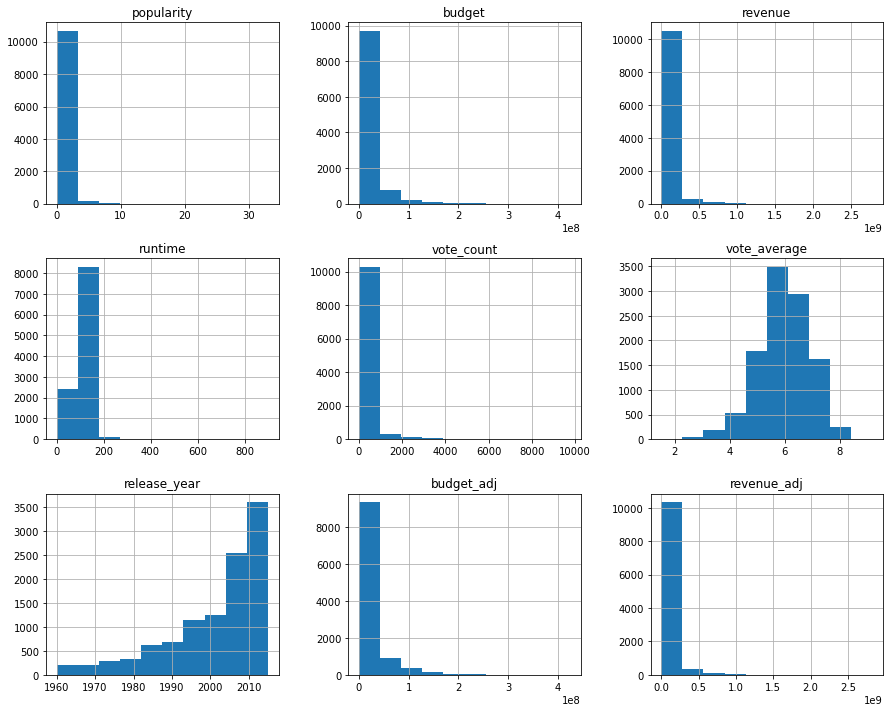

In [10]:
df.hist(figsize=(15,12))

* The number of movies released after 2010 is increased from the previous years.

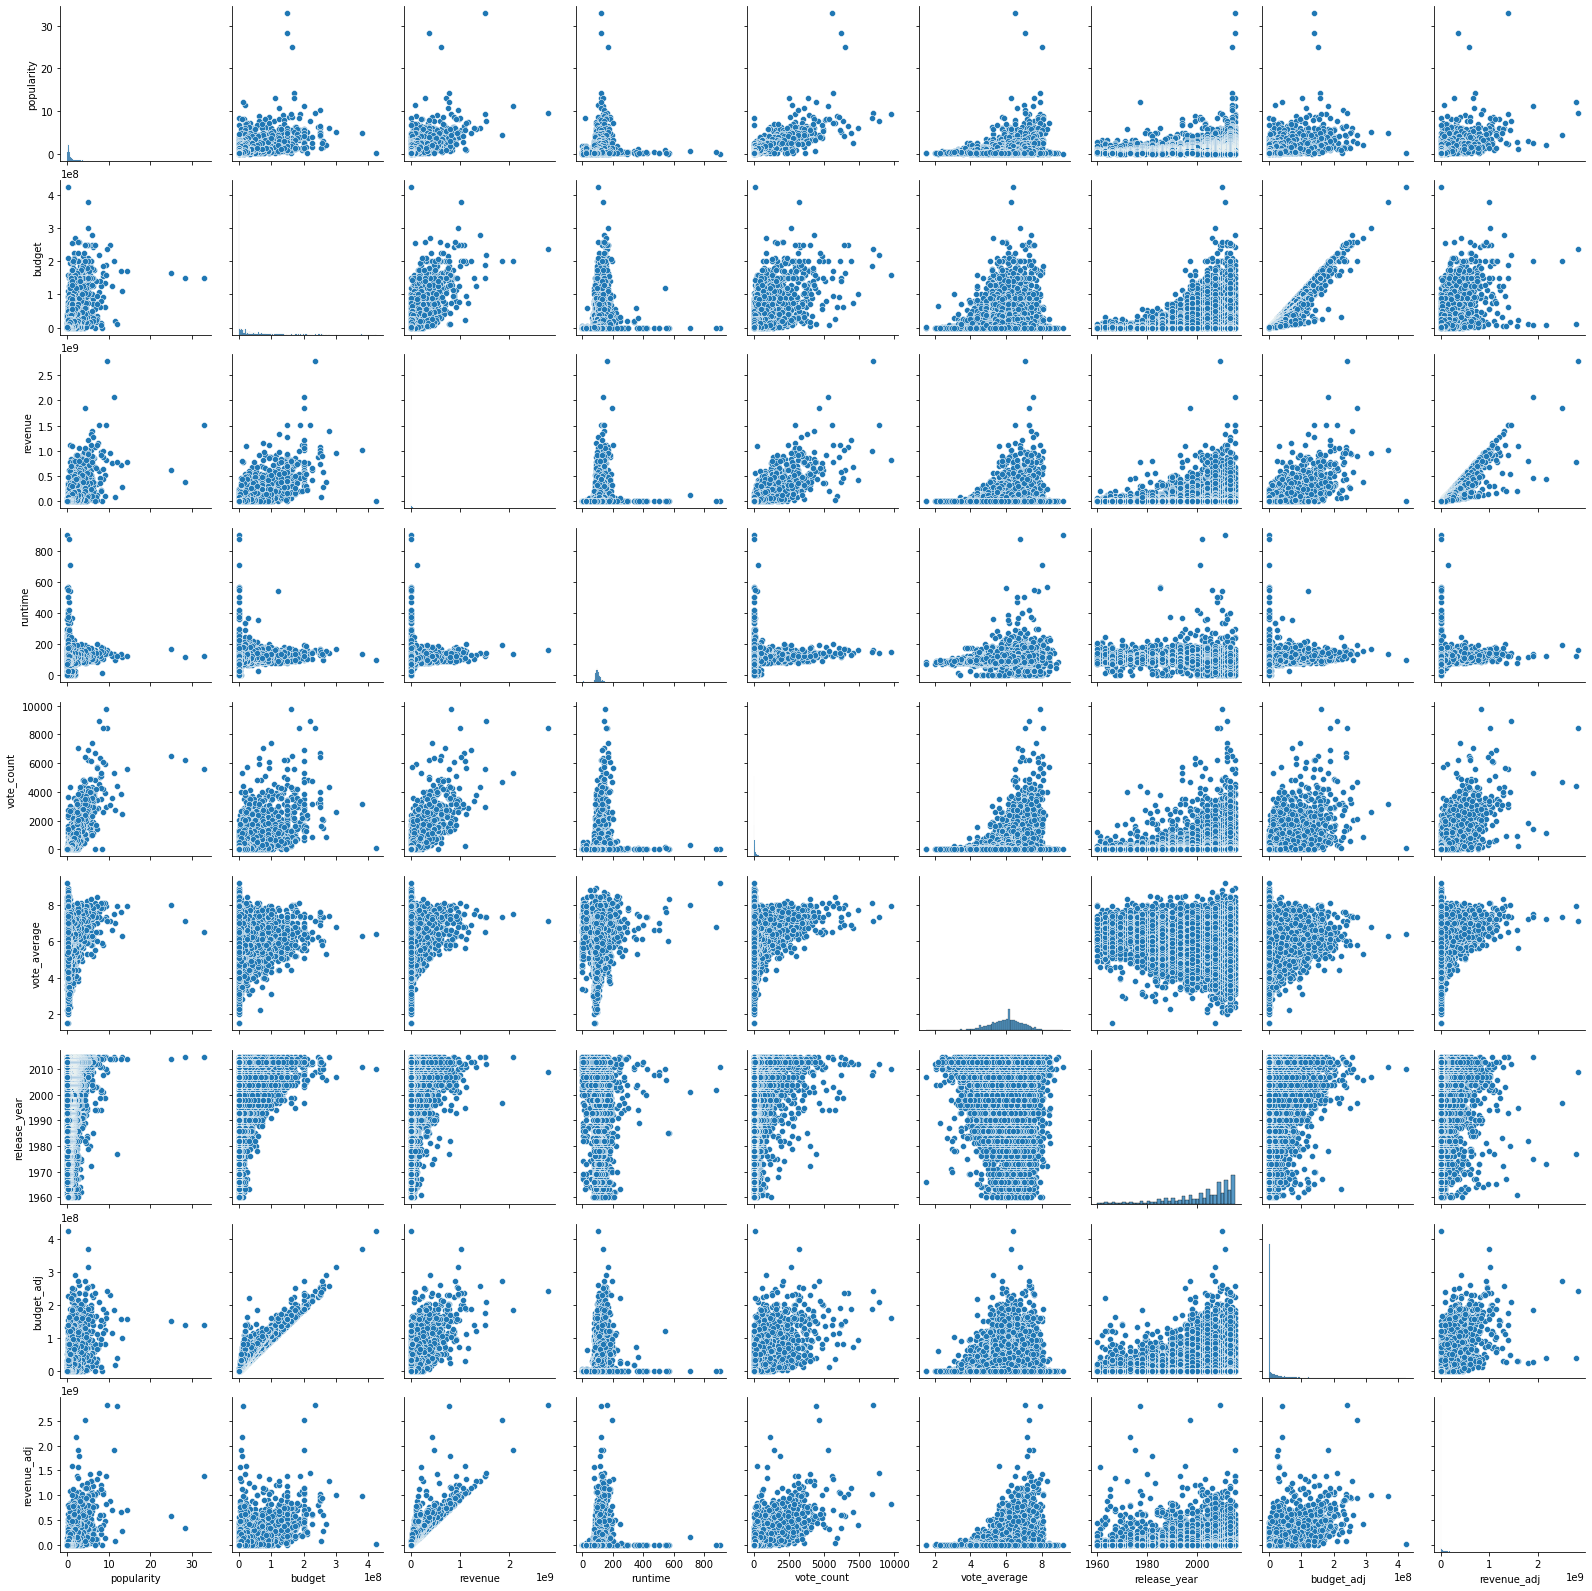

In [11]:
sns.pairplot(df)

* There is a positive correlation between the vote_count and the revenue
* There is also a positive correlation between the vote_count and popularity which is make sense.

<a id='q1'></a>
### Q1: What is the highest genre in terms of revenue in the year 2015?

In [12]:
# get a subset from the data where the release year is = 2015 and the geres values does not contain "Unkown"
df_2015 = df.loc[(df['release_year'] == 2015) & (df['genres'] != "Unkown")]

# seperat the genre value into several raws
df_2015 = get_single_item(df_2015, 'genres')

<AxesSubplot:title={'center':'Genres in the year 2015'}, ylabel='genres'>

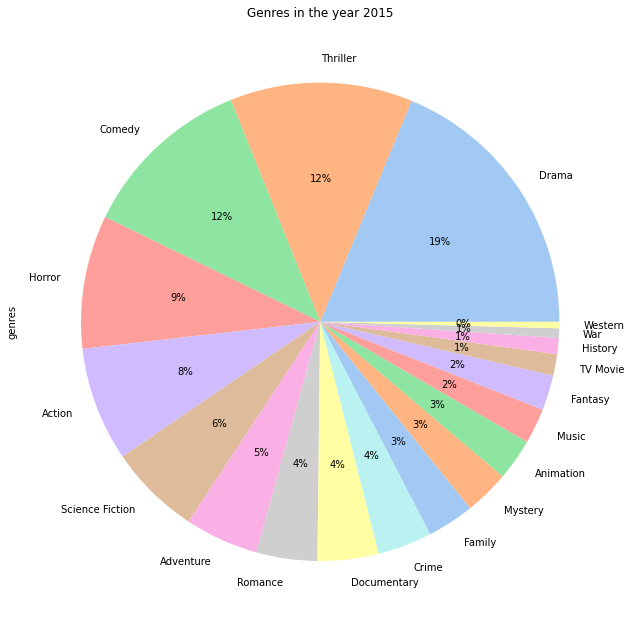

In [13]:
# EDA: pie plot

plt.figure(figsize=(12,11))
plt.title("Genres in the year 2015")
palette_color = sns.color_palette('pastel')
df_2015.genres.value_counts().plot(kind='pie', autopct='%.0f%%',  colors=palette_color)

* The dominated genre in 2015 was the Drama

In [14]:
# get the revenue for each genre using group by , and sort the values in descending order.
genres_revenue_15 = pd.DataFrame(df_2015.groupby(['genres'])['revenue'].sum())\
.sort_values(['revenue'], ascending=False)

In [15]:
genres_revenue_15

,revenue
genres,
Adventure,13626662963
Action,13217478025
Science Fiction,9617062126
Thriller,7744667271
Comedy,7679196242
Drama,6394798248
Family,5098378913
Crime,4518312743
Animation,4160455801


<AxesSubplot:title={'center':'Revenue based on genre in 2015'}, xlabel='revenue', ylabel='genres'>

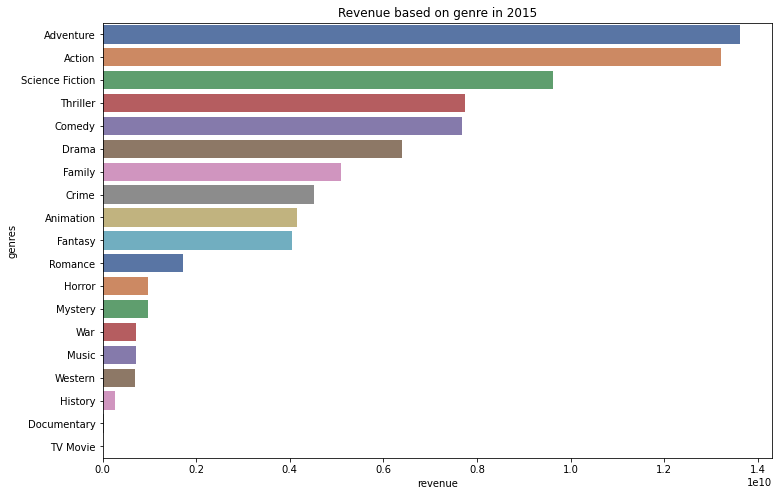

In [16]:
# bar chart
plt.figure(figsize=(12,8))
plt.title("Revenue based on genre in 2015")
sns.barplot(x=genres_revenue_15['revenue'] , y=genres_revenue_15.index, palette='deep')

<a id='q2'></a>
### Q2: Who is the more actor acting in the period from 2010 to 2015?

In [17]:
# sub DataFrame contins release_year and cast witout unkown cast
cast_df = df[['release_year', 'cast']].loc[df['cast'] != 'Unkown']

# seperate the values of cast column to get every single actor count ,acting in the period from 2010 to 2015
actors_2010_to_2015 = get_single_item(cast_df[cast_df['release_year'] >= 2010], 'cast')

In [18]:
# save the result in a data frame
actors = pd.DataFrame(actors_2010_to_2015.cast.value_counts())

In [19]:
actors

,cast
James Franco,26
Danny Trejo,22
Robert De Niro,21
Samuel L. Jackson,19
Jessica Chastain,18
...,...
Rich Bentz,1
Josh Bonzie,1
Dinesh D'Souza,1
Sterling Jones,1


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'James Franco'),
  Text(1, 0, 'Danny Trejo'),
  Text(2, 0, 'Robert De Niro'),
  Text(3, 0, 'Samuel L. Jackson'),
  Text(4, 0, 'Jessica Chastain'),
  Text(5, 0, 'Olivia Wilde'),
  Text(6, 0, 'Liam Neeson'),
  Text(7, 0, 'Nicolas Cage'),
  Text(8, 0, 'Ben Kingsley'),
  Text(9, 0, 'Bruce Willis')])

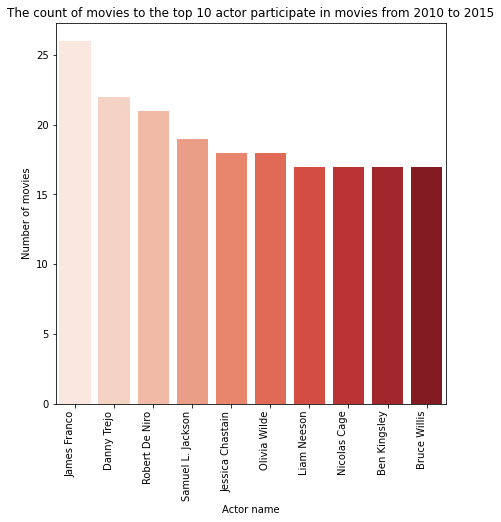

In [20]:
# get only the top 10
data = actors.head(10)

plt.figure(figsize=(7,7))
plt.title("The count of movies to the top 10 actor participate in movies from 2010 to 2015")
sns.barplot(x=data.index, y=data['cast'], palette='Reds')
plt.ylabel("Number of movies")
plt.xlabel("Actor name")
plt.xticks(rotation=90, ha='right')

<a id='q3'></a>
### Q3: What are the top 10 movies that make a loss where revenue does not exceed the budget?

In [21]:
# determine the movies whose revenue is less than the budget
loss_df = df.loc[(df['budget'] > df['revenue']) & (df['revenue'] != 0)]

# claculate the loss and add it in new column
loss_df['loss'] = loss_df['budget'] - loss_df ['revenue']

# data frame contain the top 10 movies that make loss.
top10_loss_df = loss_df[['original_title', 'release_year', 'budget', 'revenue','loss']].sort_values(['loss'], ascending=False)\
.head(10)

In [22]:
top10_loss_df

,original_title,release_year,budget,revenue,loss
2244,The Warrior's Way,2010,425000000,11087569,413912431
5508,The Lone Ranger,2013,255000000,89289910,165710090
7031,The Alamo,2004,145000000,25819961,119180039
3484,Mars Needs Moms,2011,150000000,38992758,111007242
4970,Brother Bear,2003,100000000,250,99999750
2435,The 13th Warrior,1999,160000000,61698899,98301101
4078,The Adventures of Pluto Nash,2002,100000000,7103973,92896027
6707,Charlotte's Web,2006,85000000,144,84999856
6590,Flushed Away,2006,149000000,64459316,84540684
2915,Australia,2008,130000000,49554002,80445998


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

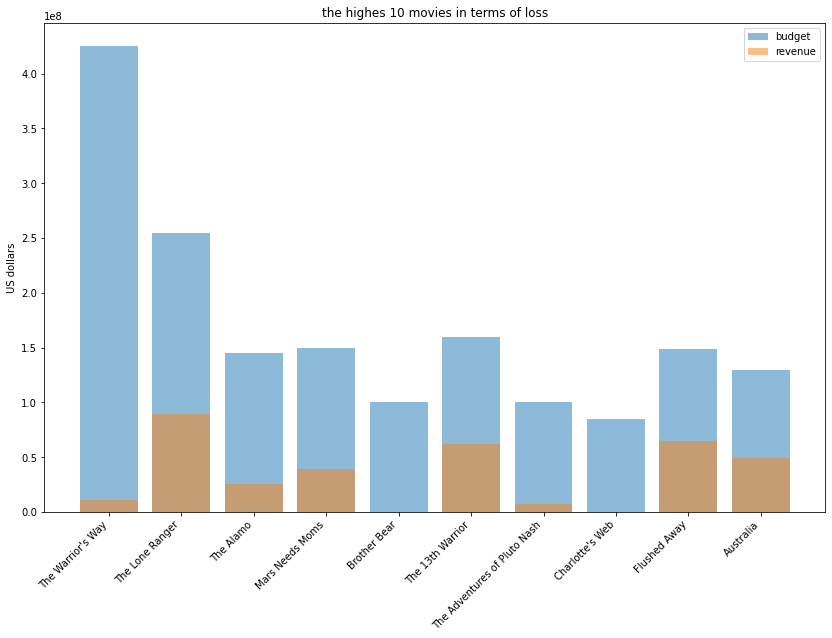

In [24]:
bar1= top10_loss_df['budget']
bar2= top10_loss_df['revenue']

plt.figure(figsize=(14,9))
plt.title("the highes 10 movies in terms of loss")
plt.bar(top10_loss_df['original_title'], bar1, alpha=0.5)
plt.bar(top10_loss_df['original_title'], bar2, alpha=0.5)
plt.legend(['budget','revenue'])
plt.ylabel("US dollars")
plt.xticks(rotation=45, ha='right')

<a id='conclusions'></a>
## Conclusions

In the conclusion we can figure out the answers to the questions stated in this investigation or analysis as follow:
* The highest genre in terms of revenue in the year 2015 was the Adventure genre.
* The most participating actor from 2010 to 2015 is James Franco , he did act in 26 movies in that period.
* The highest movie that made a loss is "The Warrior's Way" with a loss equal to 413,912,431.

**Limitations**: the movies can have multiple genres, so the results may overlap a little.